In [138]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

#Step0: Create dataset

#make input data and expected output data
input_data , expected_output_data = datasets.make_regression(n_samples = 100, n_features = 1, noise = 10, random_state=4)

#expected_output_data is a list and input_data is an array, we need to uniform the datastructure
expected_output_data_res = np.resize(expected_output_data, (100,1))

#datasets make dataset in numpy form, to calculate gradients, it must be transformed into torch
input_data_torch = torch.from_numpy(input_data.astype(np.float32))
expected_output_data_torch = torch.from_numpy(expected_output_data_res.astype(np.float32))

In [139]:
#Step1: Define a model

#determine samples and features from the shape of dataset
samples, feature = input_data.shape
input_dim = feature
output_dim = feature

#define a model class
class My_model(nn.Module):
    def __init__(self, input_size, output_size):
        super(My_model, self).__init__()
        self.Layer1 = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        return self.Layer1(x)

model = My_model(input_dim, output_dim)
print(model)

My_model(
  (Layer1): Linear(in_features=1, out_features=1, bias=True)
)


In [140]:
#Step2: Loss function and optimizer

learning_rate = 0.01
lossfn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [151]:
#Step3: Training Loop
iterations = 100

for epoch in range(iterations):
    #foward pass
    predicted_output = model(input_data_torch)
    #calculate the loss then backward to get gradients
    loss = lossfn(predicted_output, expected_output_data_torch)
    loss.backward()
    #update weights and bias based on gradients
    optimizer.step()
    #Note: the gradients has to be reset in each epoch, since the optimizer will accumulate gradients
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        [weight, bias] = model.parameters()
        print(f'epoch:{epoch+1}, loss:{loss.item():.3f}, weight:{weight[0].item():.3f}, bias:{bias[0].item():.3f}')

epoch:10, loss:72.540, weight:75.443, bias:-0.216
epoch:20, loss:72.540, weight:75.443, bias:-0.216
epoch:30, loss:72.540, weight:75.443, bias:-0.216
epoch:40, loss:72.540, weight:75.443, bias:-0.216
epoch:50, loss:72.540, weight:75.443, bias:-0.216
epoch:60, loss:72.540, weight:75.443, bias:-0.216
epoch:70, loss:72.540, weight:75.443, bias:-0.216
epoch:80, loss:72.540, weight:75.443, bias:-0.216
epoch:90, loss:72.540, weight:75.443, bias:-0.216
epoch:100, loss:72.540, weight:75.443, bias:-0.216


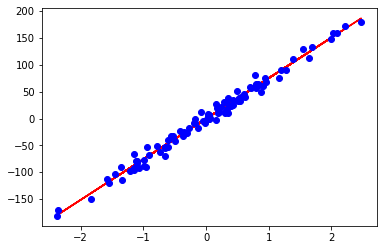

[[-101.87252   ]
 [  26.365824  ]
 [  71.809326  ]
 [   2.4944892 ]
 [   3.4057047 ]
 [   3.450726  ]
 [  54.35505   ]
 [  60.29581   ]
 [ -86.50767   ]
 [  13.319256  ]
 [ -49.080994  ]
 [ -84.16996   ]
 [-119.761345  ]
 [  -6.854033  ]
 [ 186.62498   ]
 [ -55.460304  ]
 [ 116.492775  ]
 [ -10.076786  ]
 [  22.45049   ]
 [ -71.46207   ]
 [ -23.072552  ]
 [ -28.46529   ]
 [ -87.48976   ]
 [  44.94229   ]
 [-179.7535    ]
 [ -46.061535  ]
 [  40.708138  ]
 [ 152.36034   ]
 [   3.264575  ]
 [  39.259357  ]
 [  22.201202  ]
 [-116.61928   ]
 [ 127.460556  ]
 [  15.575212  ]
 [ -31.773968  ]
 [  65.48291   ]
 [ -86.78516   ]
 [ -13.434444  ]
 [ -72.77539   ]
 [  14.016009  ]
 [  90.46669   ]
 [ 149.92186   ]
 [-102.8914    ]
 [  -4.332106  ]
 [  87.61381   ]
 [-110.025955  ]
 [   1.2241724 ]
 [ -58.966534  ]
 [   2.6166642 ]
 [ -26.327007  ]
 [ -49.34648   ]
 [  11.73939   ]
 [ -91.422745  ]
 [ -49.0763    ]
 [  68.80234   ]
 [-139.09729   ]
 [  37.501812  ]
 [  95.73382   ]
 [  52.11114  

In [152]:
#Step4 Plot the prediction

prediction = model(input_data_torch).detach().numpy()
plt.plot(input_data, prediction,'r')
plt.plot(input_data, expected_output_data,'bo')
plt.show()
print(prediction)
print(expected_output_data_res)